<h1 style="text-align:center">Modeling Educational Data with Machine Learning Methods</h1>

## 1. Let's Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

C:\Users\bahra\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 2. Read the dataset

In [2]:
# Load the dataset
df = pd.read_csv('students_data.csv')
df = df.drop('ID', axis=1)

## 3. EDA

#### Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  faKHup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

As a result of this command, you can verify that there are no omissions in the data. This command also shows the type of the characteristic. Now we derive some basic statistics for our categorical and numerical characteristics

In [4]:
# Get summary statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,10th,11th,12th
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,54.727011,56.230843,56.709770
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,17.145176,16.425355,19.323979
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,45.000000,45.000000,50.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,55.000000,55.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,65.000000,65.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,95.000000,95.000000,100.000000


* We have `1044` observations.
* We have some catagorical variables as well.
* The hightest score for `10th` and `11th` is `95`, and for `12th` is `100`

In [5]:
# For categorical features
df.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,faKHup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,HS,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


For numerical characteristics, all the parameters are fairly understandable, but as far as categorical parameters are concerned, it is necessary to clarify slightly. 
* `count` - number of objects
* `unique` - the number of unique values ​​for the characteristic
* `top` is the most common value for a characteristic
* `freq` - frequency of repetition of the most common value for the characteristic

**Also for simplicity of work we will translate our categorical data into binary**

In [6]:
binary_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'faKHup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    unique_values = df[col].unique()
    df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})
    
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'guardian', 'reason'])

In [7]:
# df['sex'] = df['sex'].map({'M': 1, 'F': 0})
# df['school'] = df['school'].map({'HS': 1, 'KH': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             1044 non-null   int64
 1   sex                1044 non-null   int64
 2   age                1044 non-null   int64
 3   address            1044 non-null   int64
 4   famsize            1044 non-null   int64
 5   Pstatus            1044 non-null   int64
 6   Medu               1044 non-null   int64
 7   Fedu               1044 non-null   int64
 8   traveltime         1044 non-null   int64
 9   studytime          1044 non-null   int64
 10  failures           1044 non-null   int64
 11  schoolsup          1044 non-null   int64
 12  faKHup             1044 non-null   int64
 13  paid               1044 non-null   int64
 14  activities         1044 non-null   int64
 15  nursery            1044 non-null   int64
 16  higher             1044 non-null   int64
 17  internet      

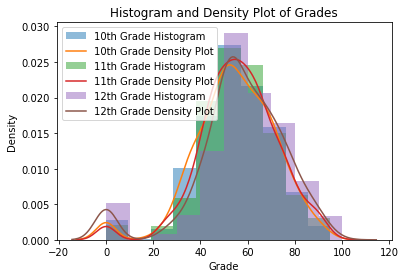

In [24]:
# Define the grades
grades = ['10th', '11th', '12th']

# Create a new figure and axes
fig, ax = plt.subplots()

# Loop through each grade
for grade in grades:
    # Plot a histogram of the grade
    plt.hist(df[grade], alpha=0.5, label=f'{grade} Grade Histogram', density=True)

    # Create a density plot of the grade
    sns.kdeplot(df[grade], label=f'{grade} Grade Density Plot')

# Set the title and labels
ax.set_title('Histogram and Density Plot of Grades')
ax.set_xlabel('Grade')
ax.set_ylabel('Density')

# Show the legend
ax.legend()

# Display the plot
plt.show()

**As we can see, our output variable (y) has a symmetric shape (Distribution) which is very good for building our model**

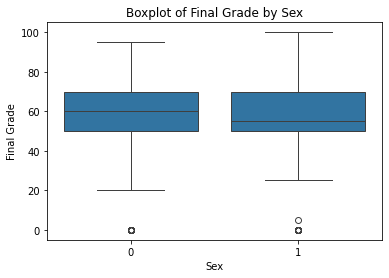

In [25]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot a boxplot of final grade by sex
sns.boxplot(x='sex', y='12th', data=df, ax=ax)

# Set the title and labels
ax.set_title('Boxplot of Final Grade by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Final Grade')

# Display the plot
plt.show()

**As we can see, it has good distribution.**
* Male student has some outliers and the median is a lower from female's median, which means female students has better scores the male students.
* There are some outliers in both female and male grade distribution.

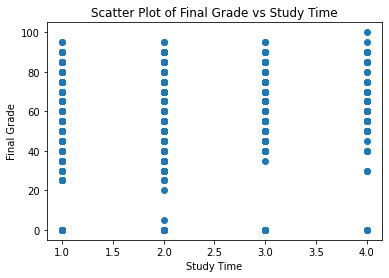

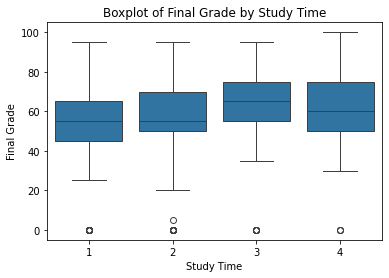

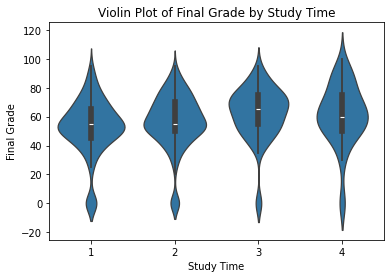

In [26]:
# Create a new figure and axes for each plot
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

# Plot a scatter plot of final grade vs study time
ax1.scatter(df['studytime'], df['12th'])
ax1.set_title('Scatter Plot of Final Grade vs Study Time')
ax1.set_xlabel('Study Time')
ax1.set_ylabel('Final Grade')

# Create a boxplot of final grade by study time
sns.boxplot(x='studytime', y='12th', data=df, ax=ax2)
ax2.set_title('Boxplot of Final Grade by Study Time')
ax2.set_xlabel('Study Time')
ax2.set_ylabel('Final Grade')

# Create a violin plot of final grade by study time
sns.violinplot(x='studytime', y='12th', data=df, ax=ax3)
ax3.set_title('Violin Plot of Final Grade by Study Time')
ax3.set_xlabel('Study Time')
ax3.set_ylabel('Final Grade')

# Display the plots
plt.show()

**As we know Study Time (weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours,
3 – 5 to 10 hours or 4 – > 10 hours)
)**

* Those who have studied less than 2 hours, they do not have a scores greater than 60 points.
* Those who have studied more than 5 hours, they are likely to have higher scores.
* As we can see, there are some outliers in the study hours more than 2 and less than 5 hours.
* And also we can observe some outliers in the other parts as well, which is not that much.

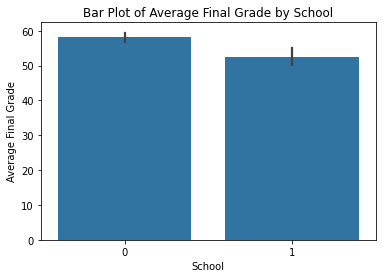

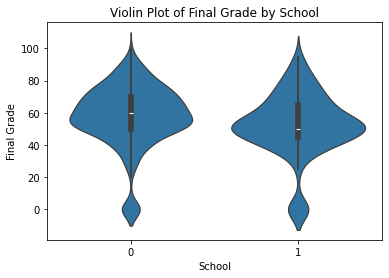

In [27]:
# Create a new figure and axes for each plot
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Create a bar plot of average final grade by school
sns.barplot(x='school', y='12th', data=df, ax=ax1)
ax1.set_title('Bar Plot of Average Final Grade by School')
ax1.set_xlabel('School')
ax1.set_ylabel('Average Final Grade')

# Create a violin plot of final grade by school
sns.violinplot(x='school', y='12th', data=df, ax=ax2)
ax2.set_title('Violin Plot of Final Grade by School')
ax2.set_xlabel('School')
ax2.set_ylabel('Final Grade')

# Display the plots
plt.show()

**As we can see, students who study at HS = Habibia Hight School in Afghanistan have good score than the other school. For your information, Habibia High School is one the best state schools. Thus, we can say, if a school has good repution, then it is likely the students will have good scores.**

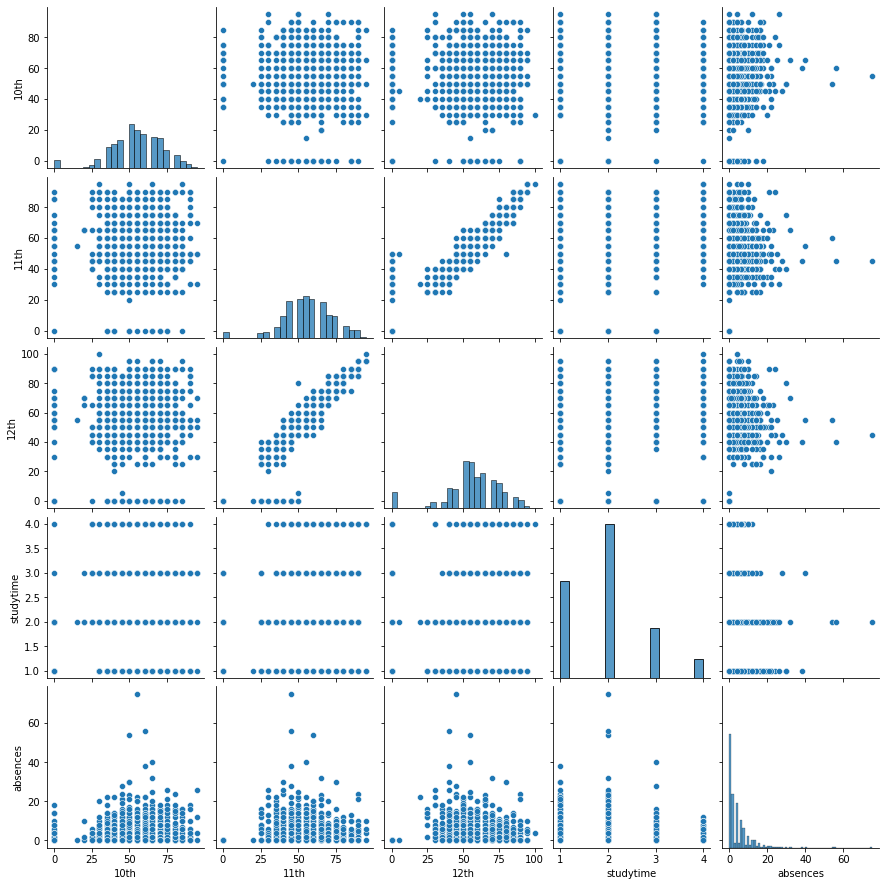

In [28]:
# Create a pair plot of selected variables
sns.pairplot(df[['10th', '11th', '12th', 'studytime', 'absences']])
plt.show()

C:\Users\bahra\AppData\Local\Temp\ipykernel_5016\3494805761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlations.index, x=correlations, palette="rocket", ax=ax)


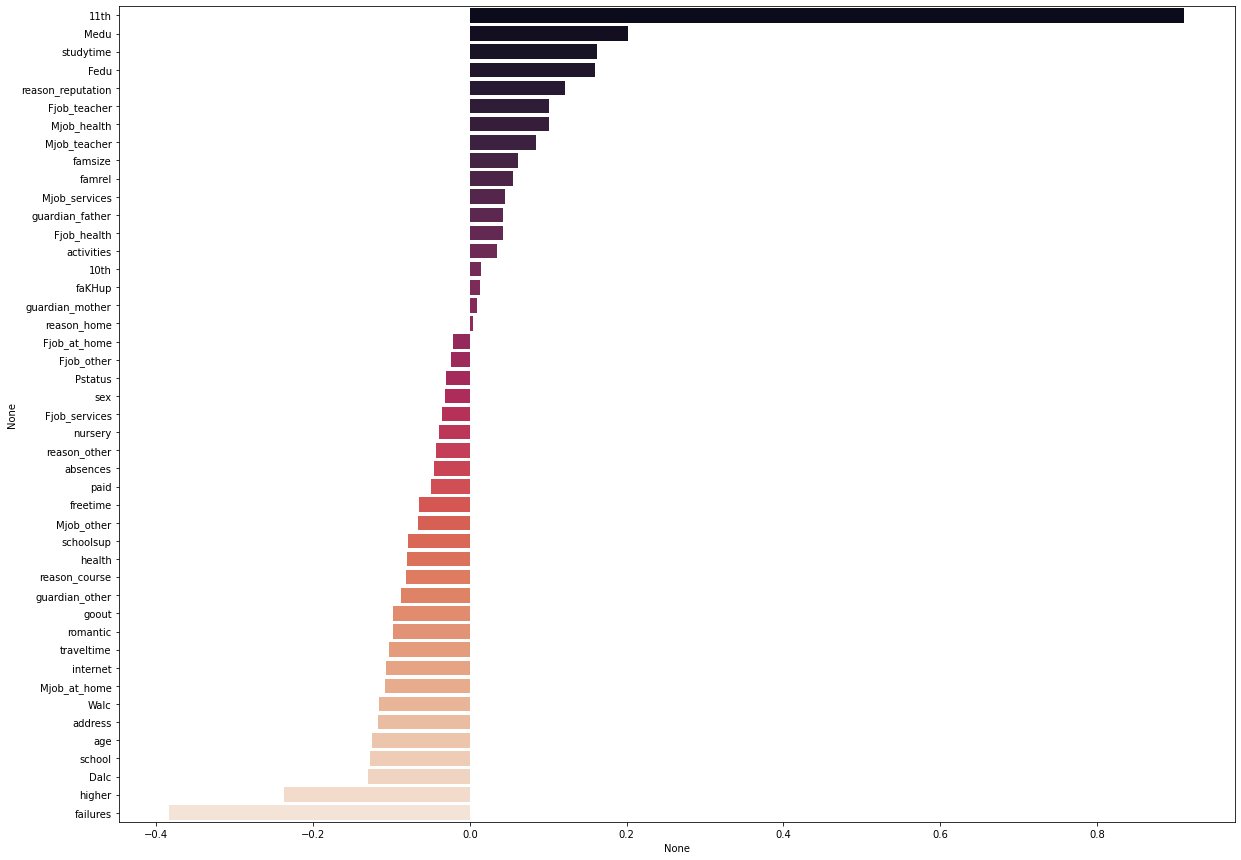

In [29]:
# Define the target variable and the features
y = df["12th"]
X = df.drop(columns=['12th'])

# Select the numeric features
numeric_features = X.select_dtypes([np.number]).columns

# Compute the correlations with the target variable
correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)

# Create a new figure and axes
fig, ax = plt.subplots()

# Create a bar plot of the correlations
sns.barplot(y=correlations.index, x=correlations, palette="rocket", ax=ax)

# Set the size of the figure
fig.set_size_inches(20, 15)

# Display the plot
plt.show()


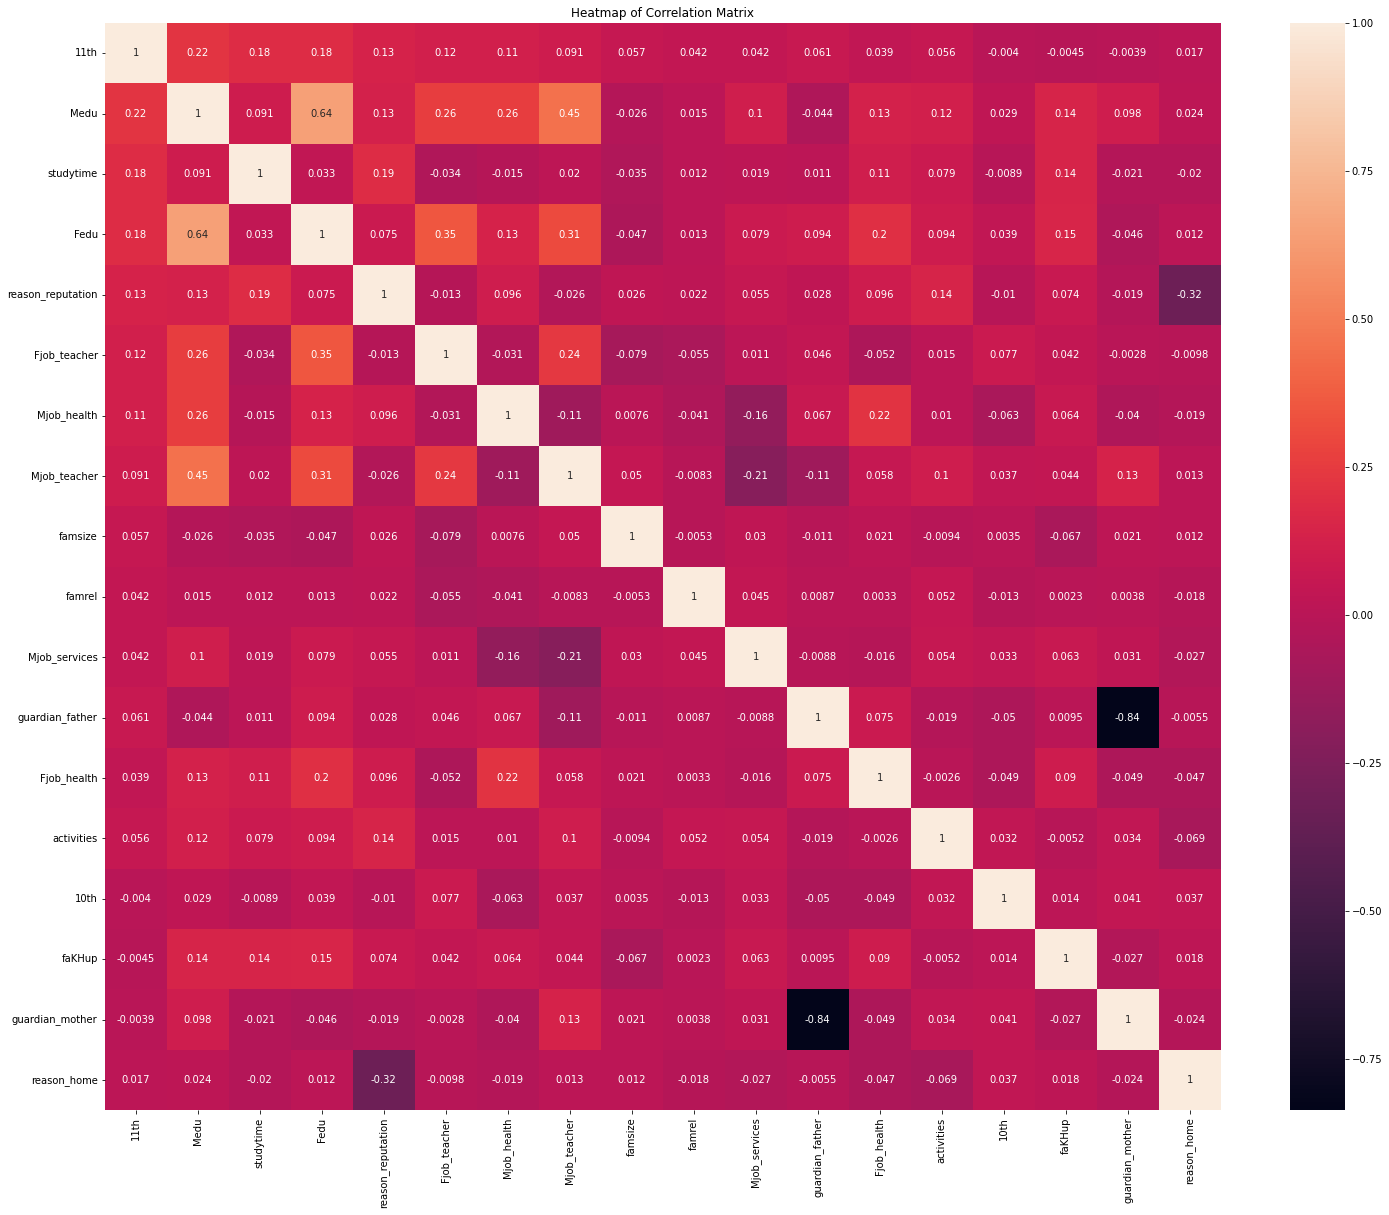

In [30]:
# Get column names with correlation > 0
positive_corr_columns = correlations[correlations > 0].index

# Create a correlation matrix for these columns
corr_matrix = df[positive_corr_columns].corr()

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(25, 20))

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, ax=ax)

# Set the title
ax.set_title('Heatmap of Correlation Matrix')

# Display the plot
plt.show()

### Analysis

The most important features are:
* `11th`
* `Medu` 
* `studytime`   
* `Fedu`             
* `reason_reputation`
* `Fjob_teacher`     
* `Mjob_health`       
* `Mjob_teacher`     
* `famsize`           
* `famrel`
* `Mjob_services`     
* `guardian_father`
* `Fjob_health`     
* `activities`      
* `10th`             
* `faKHup`            
* `guardian_mother`
* `reason_home`  

According to this table, you can see that the final score is not strongly correlated with anyone (there is no strong dependence). If you look closely, the highest correlation coefficient is reached in `12th` `11th` (~ 0.92). It can also be noticed that the otasal signs also do not strongly correlate with each other, the correlation coefficient does not exceed 50% in any feature. Also, for clarity, you can welcome the rendering of the correlation matrix

**Now it is necessary to evaluate the distribution of the `reason` attribute depending on the score on a 4-point scale. That is, you can now not draw the density graphs for each of the traits, but simply find the average value of the vector of estimates for each of the reasons for choosing the school, that is:**

reason_home: 56.84108527131783
reason_course: 54.825581395348834
reason_reputation: 60.90725806451613
reason_other: 54.25925925925926


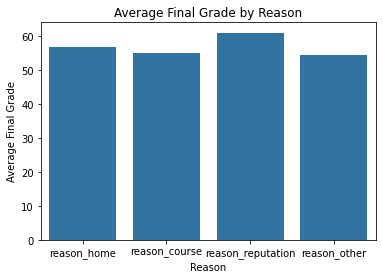

In [31]:
# Define the reasons
reasons = ['reason_home', 'reason_course', 'reason_reputation', 'reason_other']


# Loop through each reason
for reason in reasons:
    # Compute the mean final grade for the reason
    mean_grade = df[df[reason] == 1]['12th'].mean()

    # Print the result
    print(f'{reason}: {mean_grade}')

# Compute the mean final grade for each reason
mean_grades = [df[df[reason] == 1]['12th'].mean() for reason in reasons]

# Create a new figure and axes
fig, ax = plt.subplots()

# Create a bar plot of the mean grades
sns.barplot(x=reasons, y=mean_grades, ax=ax)

# Set the title and labels
ax.set_title('Average Final Grade by Reason')
ax.set_xlabel('Reason')
ax.set_ylabel('Average Final Grade')

# Display the plot
plt.show()

From these results, we can conclude that, despite the fact that the reason for choosing a school was pursued by the student's parents (or the student himself), the average final score on the 4-point scale is `Satisfactory`

# Part 2: Regression

To begin with, we will prepare a little more of our data, namely, we divide them into a training and test sample

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [12]:
cols = ['12th']
X = df.drop(cols, axis=1)
y = df['12th'][:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In our study, we applied various machine learning models to predict student performance based on a dataset of high school students. The models used were Linear Regression, Lasso, Ridge, K-Nearest Neighbors (KNN), Polynomial Regression, Decision Tree, Random Forest, and Support Vector Regression (SVR).

The performance of the models was evaluated using several metrics: R2 Score, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the average R2 score from 5-fold cross-validation.

### Let's test our models without hyperparameter tunning

In [11]:
# Initialize an empty DataFrame to store the results
results_df_ = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'Avg R2 Cross-Val'])

def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name=None):
    # Check if the model is PolynomialFeatures for Polynomial Regression
    if isinstance(model, PolynomialFeatures):
        # Transform the input data
        X_train_transformed = model.fit_transform(X_train)
        X_test_transformed = model.transform(X_test)

        # Fit the transformed data to a Linear Regression model
        linear_reg = LinearRegression()
        linear_reg.fit(X_train_transformed, y_train)
        y_pred = linear_reg.predict(X_test_transformed)

        # Use the Linear Regression model for the remaining calculations
        model = linear_reg
        if model_name is None:
            model_name = model.__class__.__name__
        else:
            model_name = f"{model_name} with {model.__class__.__name__}"
    else:
        # Fit the model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if model_name is None:
            model_name = model.__class__.__name__

    # Calculate R2 score and cross-validation score
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Append the results to the DataFrame
    global results_df_
    result = pd.DataFrame({
        'Model': [model_name],
        'R2 Score': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'Avg R2 Cross-Val': [scores.mean()]
    })
    results_df_ = pd.concat([results_df_, result], ignore_index=True)

    return model

# Define models
models = [
    (LinearRegression(), "Linear Regression"),
    (Lasso(alpha=1.0), "Lasso"),
    (Ridge(alpha=1.0, solver='auto', max_iter=10000), "Ridge"),
    (KNeighborsRegressor(n_neighbors=5, algorithm='auto'), "K-Nearest Neighbors"),
    (PolynomialFeatures(degree=1), "Polynomial Regression"), # for polynomial regression
    (DecisionTreeRegressor(max_depth=None, min_samples_split=2), "Decision Tree"),
    (RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2), "Random Forest"),
    (SVR(C=1.0, gamma='scale', kernel='rbf'), "Support Vector Regression")
]

# Train and evaluate each model
for model, model_name in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name)

In [12]:
# Define models
models = [
    (LinearRegression(), "Linear Regression"),
    (Lasso(alpha=1.0), "Lasso"),
    (Ridge(alpha=1.0, solver='auto', max_iter=10000), "Ridge"),
    (KNeighborsRegressor(n_neighbors=5, algorithm='auto'), "K-Nearest Neighbors"),
    (PolynomialFeatures(degree=1), "Polynomial Regression"), # for polynomial regression
    (DecisionTreeRegressor(max_depth=None, min_samples_split=2), "Decision Tree"),
    (RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2), "Random Forest"),
    (SVR(C=1.0, gamma='scale', kernel='rbf'), "Support Vector Regression")
]

# Train and evaluate each model
for model, model_name in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name)

In [13]:
results_df_

,Model,R2 Score,MAE,MSE,RMSE,Avg R2 Cross-Val
0,Linear Regression,0.82759,5.328884,68.934855,8.302702,0.805483
1,Lasso,0.846666,4.754409,61.307766,7.829928,0.820608
2,Ridge,0.827852,5.32302,68.830283,8.296402,0.805914
3,K-Nearest Neighbors,0.827029,5.11465,69.159236,8.316203,0.791977
4,Polynomial Regression with LinearRegression,0.827591,5.32889,68.934695,8.302692,0.805483
5,Decision Tree,0.76463,5.318471,94.10828,9.700942,0.621743
6,Random Forest,0.864777,4.781449,54.066513,7.352993,0.818189
7,Support Vector Regression,0.781698,5.364419,87.284134,9.342598,0.739661


It's important to note that these models were trained without hyperparameter tuning (i.e., grid search was not used). The **Random Forest** model achieved the highest R2 score of **~0.86**, indicating it was the most effective at predicting student performance in our study. The **Lasso** model also performed well, with an R2 score of **~0.84**. On the other hand, the **Polynomial Regression** model had a similar performance to the Linear Regression model with an R2 score of **~0.82**. The **Decision Tree** and **Support Vector Regression (SVR)** models had lower R2 scores, suggesting they might not be the best fit for this particular dataset.

These findings provide valuable insights into the factors affecting student performance and can inform strategies to improve educational outcomes. However, the choice of model and interpretation of results should be tailored to the specific context and objectives of the study. Further research is needed to validate and build upon these findings, potentially including hyperparameter tuning to optimize model performance.

In [76]:
# # Specify the columns you want to include
# cols = ['11th', 'Medu', 'studytime', 'Fedu', 'reason_reputation', 'Fjob_teacher', 'Mjob_health', 
#         'Mjob_teacher', 'famsize', 'famrel', 'Mjob_services', 'guardian_father', 'Fjob_health', 
#         'activities', '10th', 'faKHup', 'guardian_mother', 'reason_home']

# # Create your features (X) and target (y) dataframes using only these columns
# X = df[cols]
# y = df['12th']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# results_df_ = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'Avg R2 Cross-Val'])
# # Define models
# models = [
#     (LinearRegression(), "Linear Regression"),
#     (Lasso(alpha=1.0), "Lasso"),
#     (Ridge(alpha=1.0, solver='auto', max_iter=10000), "Ridge"),
#     (KNeighborsRegressor(n_neighbors=5, algorithm='auto'), "K-Nearest Neighbors"),
#     (PolynomialFeatures(degree=1), "Polynomial Regression"), # for polynomial regression
#     (DecisionTreeRegressor(max_depth=None, min_samples_split=2), "Decision Tree"),
#     (RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2), "Random Forest"),
#     (SVR(C=1.0, gamma='scale', kernel='rbf'), "Support Vector Regression")
# ]

# # Train and evaluate each model
# for model, model_name in models:
#     train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name)

### Modeling with GridSearchCV

In [19]:
# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Best Params','R2 Score', 'MAE', 'MSE', 'RMSE', 'Avg R2 Cross-Val'])

def train_and_evaluate(model, params, X_train, y_train, X_test, y_test, model_name=None):
    best_params = None
    # Perform grid search if parameters are provided
    if params:
        clf = GridSearchCV(model, params)
        clf.fit(X_train, y_train)
        model = clf.best_estimator_
        best_params = clf.best_params_

    # Check if the model is PolynomialFeatures for Polynomial Regression
    if isinstance(model, PolynomialFeatures):
        # Transform the input data
        X_train_transformed = model.fit_transform(X_train)
        X_test_transformed = model.transform(X_test)

        # Fit the transformed data to a Linear Regression model
        linear_reg = LinearRegression()
        linear_reg.fit(X_train_transformed, y_train)
        y_pred = linear_reg.predict(X_test_transformed)

        # Use the Linear Regression model for the remaining calculations
        model = linear_reg
        if model_name is None:
            model_name = model.__class__.__name__
        else:
            model_name = f"{model_name} with {model.__class__.__name__}"
    else:
        # Fit the model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if model_name is None:
            model_name = model.__class__.__name__

    # Calculate R2 score and cross-validation score
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Append the results to the DataFrame
    global results_df
    result = pd.DataFrame({
        'Model': [model_name],
        'Best Params': [str(best_params)],
        'R2 Score': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'Avg R2 Cross-Val': [scores.mean()]
    })
    results_df = pd.concat([results_df, result], ignore_index=True)

    return model

In [20]:
# Define models and their parameters
models_params = [
    (LinearRegression(), None, "Linear Regression"),
    (Lasso(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}, "Lasso"),
    (Ridge(max_iter=10000), {'alpha': [0.1, 0.5, 1, 1.5, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}, "Ridge"),
    (KNeighborsRegressor(), {'n_neighbors': range(1,20), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, "K-Nearest Neighbors"),
    (PolynomialFeatures(degree=1), None, "Polynomial Regression"), # for polynomial regression
    (DecisionTreeRegressor(), {'max_depth': range(1,20), 'min_samples_split': range(2,10)}, "Decision Tree"),
    (RandomForestRegressor(), {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1,20), 'min_samples_split': range(2,10)}, "Random Forest"),
    (SVR(), {'C': [1], 'gamma': [1, 'scale', 'auto'], 'kernel': ['rbf']}, "Support Vector Regression")
]

# Train and evaluate each model
for model, params, model_name in models_params:
    train_and_evaluate(model, params, X_train, y_train, X_test, y_test, model_name)
    print(model)

LinearRegression()
Lasso()
Ridge(max_iter=10000)
KNeighborsRegressor()
PolynomialFeatures(degree=1)
DecisionTreeRegressor()
RandomForestRegressor()
SVR()


In [21]:
results_df

,Model,Best Params,R2 Score,MAE,MSE,RMSE,Avg R2 Cross-Val
0,Linear Regression,None,0.82759,5.328884,68.934855,8.302702,0.805483
1,Lasso,{'alpha': 1},0.846666,4.754409,61.307766,7.829928,0.820608
2,Ridge,"{'alpha': 10, 'solver': 'saga'}",0.829991,5.275805,67.974936,8.244691,0.809198
3,K-Nearest Neighbors,"{'algorithm': 'kd_tree', 'n_neighbors': 7}",0.83094,5.070519,67.595541,8.221651,0.803783
4,Polynomial Regression with LinearRegression,None,0.827591,5.32889,68.934695,8.302692,0.805483
5,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.852477,4.675743,58.984341,7.680126,0.825698
6,Random Forest,"{'max_depth': 4, 'min_samples_split': 2, 'n_es...",0.87073,4.51724,51.686078,7.189303,0.831087
7,Support Vector Regression,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.781698,5.364419,87.284134,9.342598,0.739661


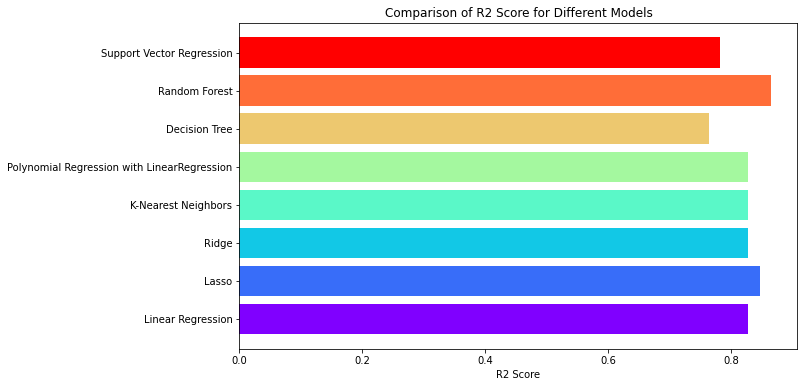

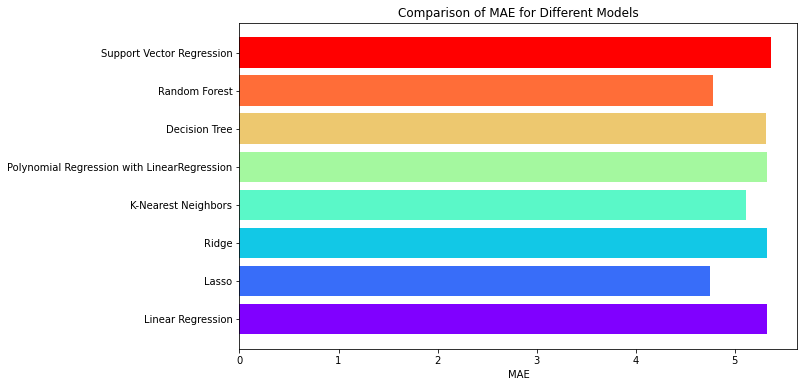

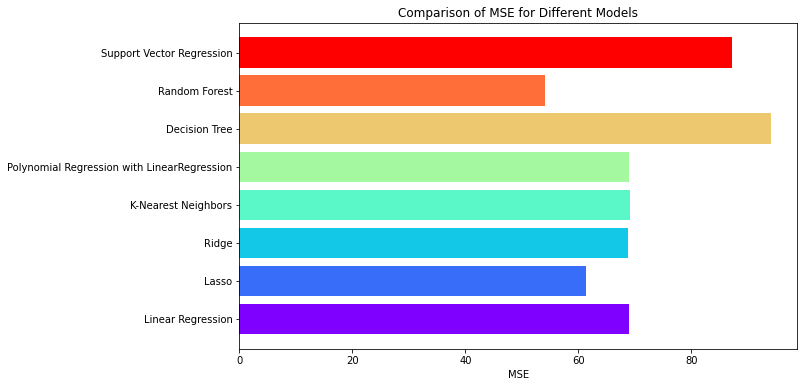

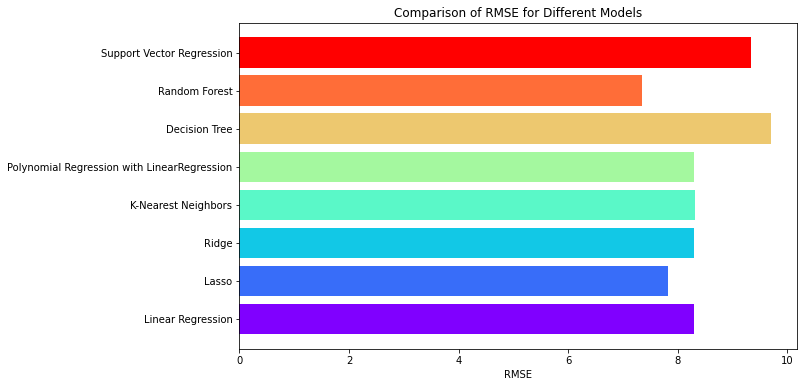

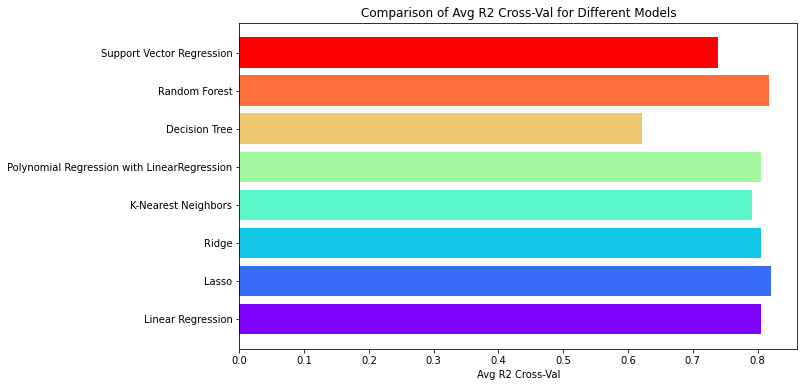

In [23]:
import matplotlib.cm as cm

# Define the metrics
metrics = ['R2 Score', 'MAE', 'MSE', 'RMSE', 'Avg R2 Cross-Val']

# Generate a color map
colors = cm.rainbow(np.linspace(0, 1, len(results_df_['Model'])))

# Loop through each metric
for metric in metrics:
    # Create a new figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a bar plot of the metric
    ax.barh(results_df_['Model'], results_df_[metric], color=colors)

    # Set the title and labels
    ax.set_xlabel(metric)
    ax.set_title(f'Comparison of {metric} for Different Models')

    # Display the plot
    plt.show()

### Conclusions

Based on the results, it appears that the **Random Forest** model performs the best in predicting the performance of high school students, as it has the highest R2 Score (0.87073), which indicates a high level of explained variance, and the lowest Mean Squared Error (MSE) (51.686078), which indicates a lower average squared difference between the predicted and actual values. 

* The Random Forest model also has the highest average R2 score (0.831087) in cross-validation, suggesting that it generalizes well to unseen data.

* The **Support Vector Regression** model, on the other hand, performs the worst among the tested models, with the lowest R2 Score (0.781698) and the highest MSE (87.284134).

* The **Lasso**, **Ridge**, and **K-Nearest Neighbors** models perform similarly, with R2 Scores around 0.83 and MSEs around 67.

* The **Decision Tree** model performs slightly better than the Lasso, Ridge, and K-Nearest Neighbors models, with an R2 Score of 0.852477 and an MSE of 58.984341.

* The **Polynomial Regression** model performs similarly to the **Linear Regression** model, with an R2 Score of 0.827591 and an MSE of 68.934695.

In conclusion, if the goal is to accurately predict the performance of high school students, the Random Forest model would be the best choice among the tested models.

## Binary classification

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, accuracy_score, roc_auc_score, log_loss
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

And also we transform our data to such a kind that it is possible to produce a binary classification. I converted the column `12th` to this kind:

* `12th`> = 45 − 1 (the student passed)
* `12th`< 45 −− 1 (the student did not pass)

In [14]:
X = df.drop(cols, axis=1)
y = df['12th'][:]
y = pd.Series(list(map(lambda x: 1 if x >= 45 else -1, y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

P.S. We will use `scoring = 'f1'` as a metric to determine the quality of a binary classification for `cross-validation`. We take this metric, since it is exactly what is needed to determine the quality of the binary classification (taken from the documentation)

In [15]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # Enable probability estimates for log loss
    "KNN": KNeighborsClassifier(),
}

In [16]:
model_results = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates needed for ROC AUC and log loss
    model_results[model_name] = {
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred_proba),
        "log_loss": log_loss(y_test, y_pred_proba),
        "cm": confusion_matrix(y_test, y_pred)
    }

In [17]:
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 10, 20]},
    "Random Forest": {"n_estimators": [10, 50, 100]},
    "SVM": {"C": [0.1, 1, 10]},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "MLP": {"hidden_layer_sizes": [(10,), (20,), (30,)]}
}

for model_name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grids[model_name])
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]  # Probability estimates needed for ROC AUC and log loss
    model_results[model_name + " with GridSearchCV"] = {
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred_proba),
        "log_loss": log_loss(y_test, y_pred_proba),
        "cm": confusion_matrix(y_test, y_pred)
    }

In [19]:
results_df = pd.DataFrame(model_results).transpose()

# Display the DataFrame
results_df

,recall,precision,f1,accuracy,roc_auc,log_loss,cm
Logistic Regression,0.925926,0.954198,0.93985,0.898089,0.952778,0.245953,"[[32, 12], [20, 250]]"
Decision Tree,0.922222,0.96139,0.941399,0.901274,0.847475,3.55845,"[[34, 10], [21, 249]]"
Random Forest,0.937037,0.973077,0.954717,0.923567,0.948611,0.20511,"[[37, 7], [17, 253]]"
SVM,0.959259,0.945255,0.952206,0.917197,0.96532,0.175238,"[[29, 15], [11, 259]]"
KNN,0.959259,0.952206,0.95572,0.923567,0.938678,0.70156,"[[31, 13], [11, 259]]"
Logistic Regression with GridSearchCV,0.925926,0.961538,0.943396,0.904459,0.961195,0.194012,"[[34, 10], [20, 250]]"
Decision Tree with GridSearchCV,0.92963,0.958015,0.943609,0.904459,0.839815,3.443661,"[[33, 11], [19, 251]]"
Random Forest with GridSearchCV,0.944444,0.962264,0.953271,0.920382,0.939141,0.211493,"[[34, 10], [15, 255]]"
SVM with GridSearchCV,0.944444,0.965909,0.955056,0.923567,0.967003,0.167662,"[[35, 9], [15, 255]]"
KNN with GridSearchCV,0.959259,0.952206,0.95572,0.923567,0.938931,0.485745,"[[31, 13], [11, 259]]"


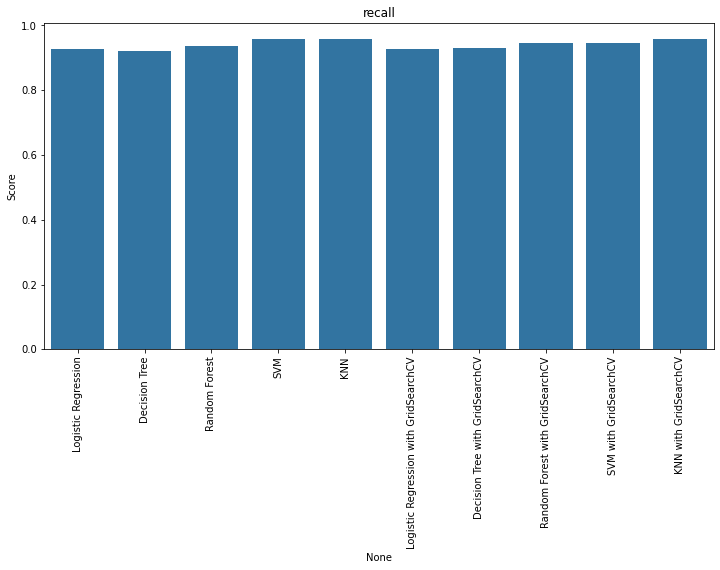

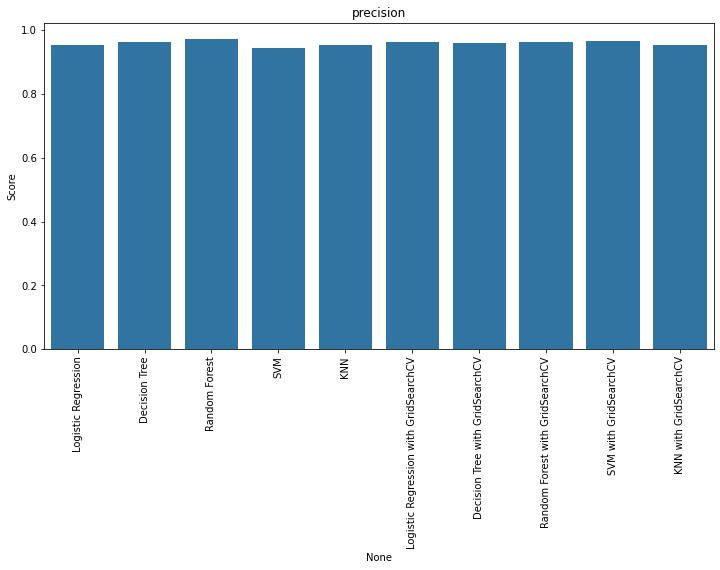

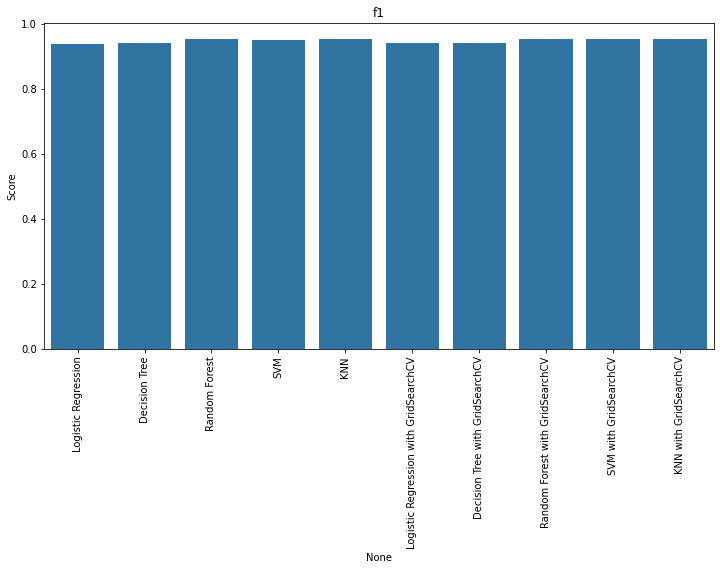

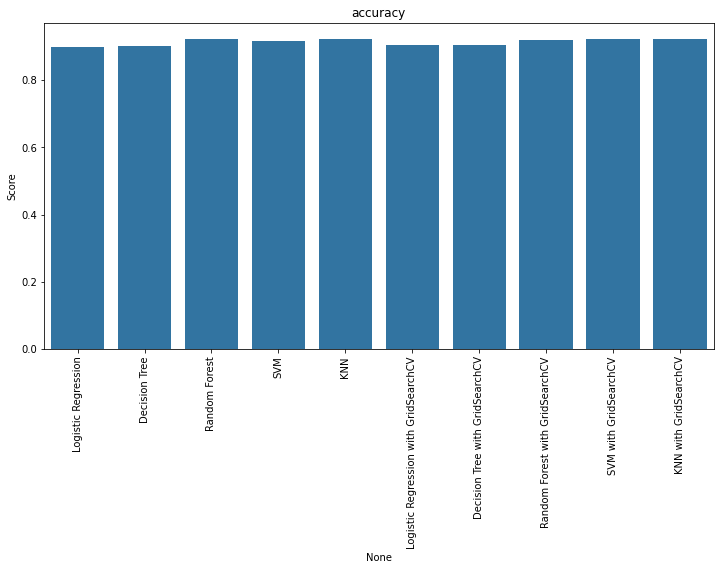

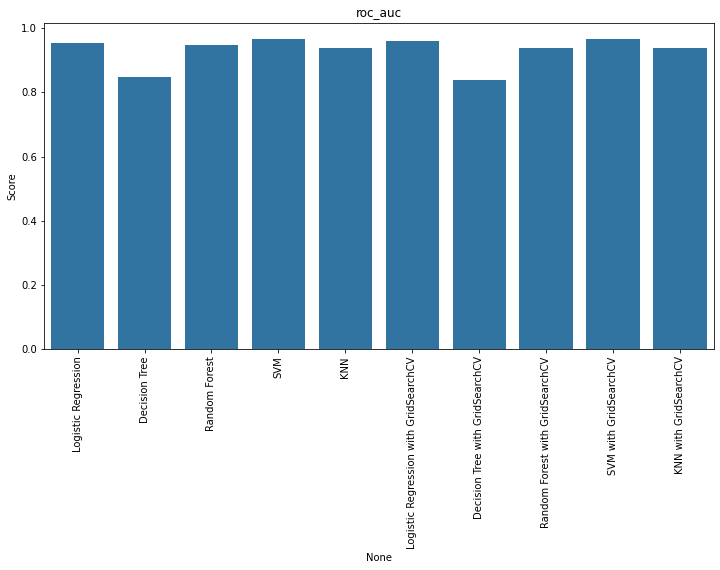

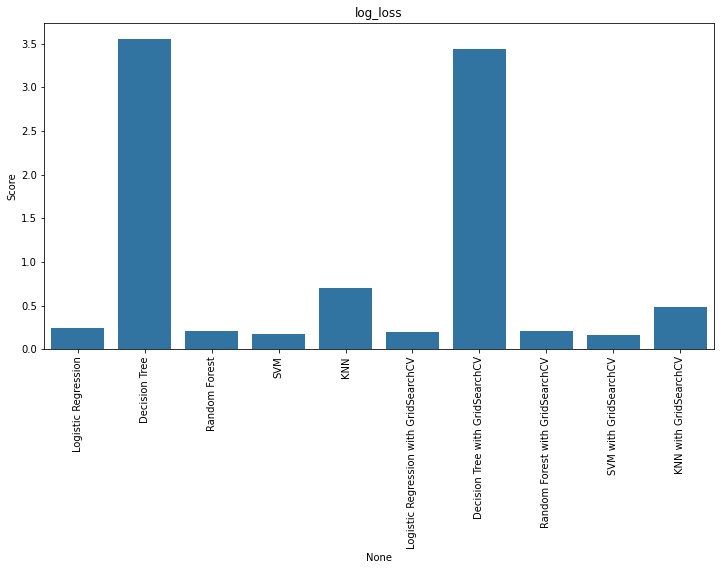

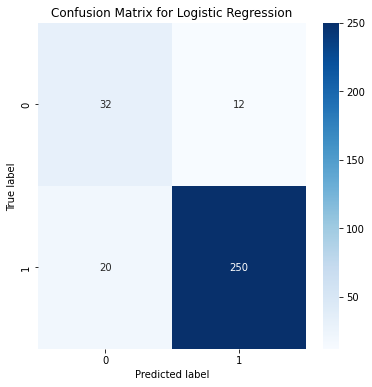

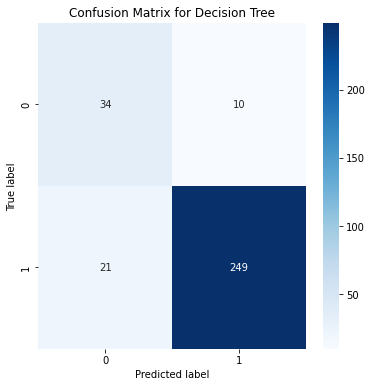

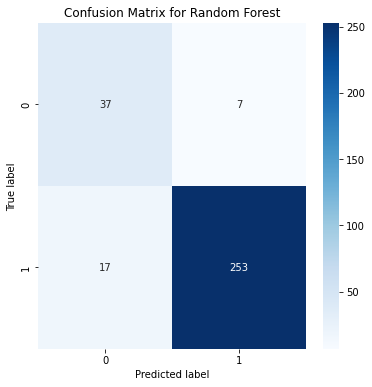

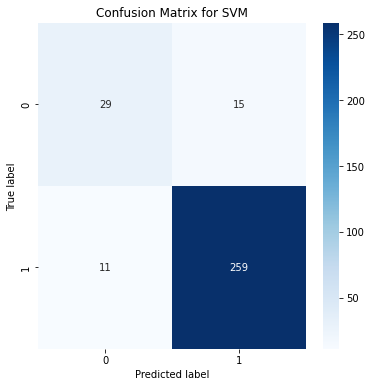

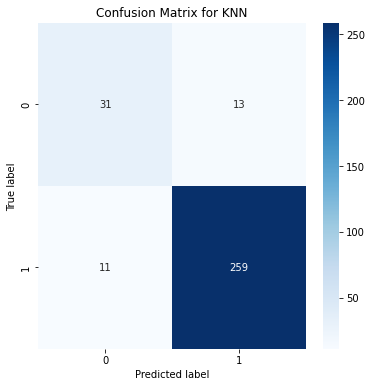

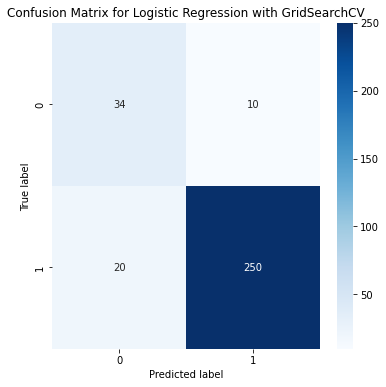

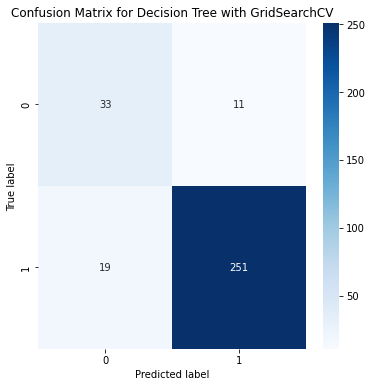

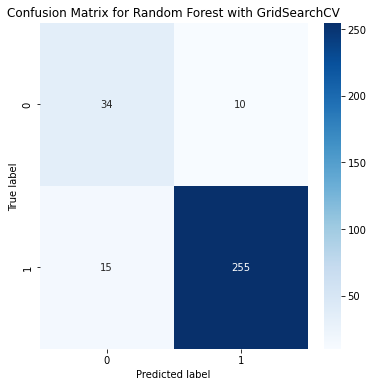

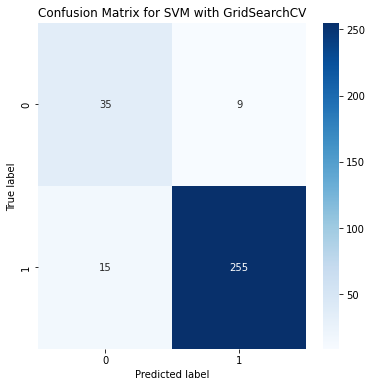

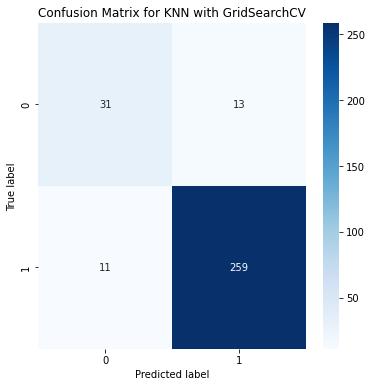

In [20]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(model_results).transpose()

# Plot the performance metrics
metrics = ["recall", "precision", "f1", "accuracy", "roc_auc", "log_loss"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(metric)
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()

# Plot the confusion matrices
for model_name, results in model_results.items():
    cm = results['cm']
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


## Conclusion

Based on the provided results, we can draw several conclusions:

1. **Best Performing Models**: The models with the highest accuracy are the **Random Forest**, **KNN**, **SVM with GridSearchCV**, and **KNN with GridSearchCV**, all achieving an accuracy of approximately **0.92**.

2. **Recall**: The **SVM**, **KNN**, and **KNN with GridSearchCV** models have the highest recall scores, all at **0.959259**. This means these models are good at identifying positive instances.

3. **Precision**: The **Random Forest** model has the highest precision score of **0.973077**, indicating that it is highly precise in its predictions.

4. **F1 Score**: The **Random Forest**, **KNN**, **SVM with GridSearchCV**, and **KNN with GridSearchCV** models have the highest F1 scores, which consider both precision and recall. This suggests these models provide a balanced performance.

5. **ROC AUC**: The **SVM** and **SVM with GridSearchCV** models have the highest ROC AUC scores, both exceeding **0.96**. This indicates these models have excellent performance in distinguishing between the classes.

6. **Log Loss**: The **SVM with GridSearchCV** model has the lowest log loss of **0.167662**, suggesting it provides the best probabilistic predictions.

7. **Confusion Matrix**: The confusion matrices show that the **Random Forest with GridSearchCV** and **SVM with GridSearchCV** models have the fewest false positives and false negatives, indicating strong performance.

In summary, if we consider all metrics, the **SVM with GridSearchCV** model appears to provide the best overall performance.